In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/refs/heads/master/Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [4]:
#checking the total rows and columns
df.shape

(1000, 40)

In [5]:
"The dataset contains 1000 rows and 40 columns."

'The dataset contains 1000 rows and 40 columns.'

In [6]:
#checking null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
#checking for duplicated value
df.duplicated().sum()

0

In [8]:
"""In dataset authorities contacted column have 91 null values and In c39 column entire column have null values. i.e.1000 so
we need to drop it. """
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [9]:
"""The dataset contains 3 types of data float64,int64,object with the memory usage."""

'The dataset contains 3 types of data float64,int64,object with the memory usage.'

In [10]:
#remove null values in Authorities Contacted using mode method
df['authorities_contacted']=df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0])

In [11]:
#again checking null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [62]:
"Checking duplicate values."

In [12]:
df.duplicated().sum()

0

In [13]:
"Now we can see No null values and duplicate values are present in dataset."

'Now we can see No null values and duplicate values are present in dataset.'

In [14]:
#checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: count, Length: 391, dtype: int64


age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: count, dtype: int64


policy_number
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: count, Length: 1000, dtype: int64


policy_bind_date
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: count, L

In [15]:
"In feature collision type,property damage and police report available have '?' so we need to change it with 'Unknown'  "
# changing '?' to "Unknown"
cols = ['collision_type', 'property_damage', 'police_report_available']
for columns in cols:
        df[columns] = df[columns].replace({'?': 'Unknown'})

In [16]:
#checking value counts of collision_type
df.collision_type.value_counts()

collision_type
Rear Collision     292
Side Collision     276
Front Collision    254
Unknown            178
Name: count, dtype: int64

In [17]:
#checking value counts of property damage
df.property_damage.value_counts()

property_damage
Unknown    360
NO         338
YES        302
Name: count, dtype: int64

In [18]:
#checking value counts of police report available
df.police_report_available.value_counts()

police_report_available
Unknown    343
NO         343
YES        314
Name: count, dtype: int64

In [19]:
#checking no of unique values in each col
df.nunique().to_frame("No of unique values")

,No of unique values
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


In [41]:
#checking the list of counts of target
df["fraud_reported"].unique()

array(['Y', 'N'], dtype=object)

In [42]:
#checking the unique values of target col
df["fraud_reported"].value_counts()

fraud_reported
N    741
Y    240
Name: count, dtype: int64

fraud_reported
N    753
Y    247
Name: count, dtype: int64


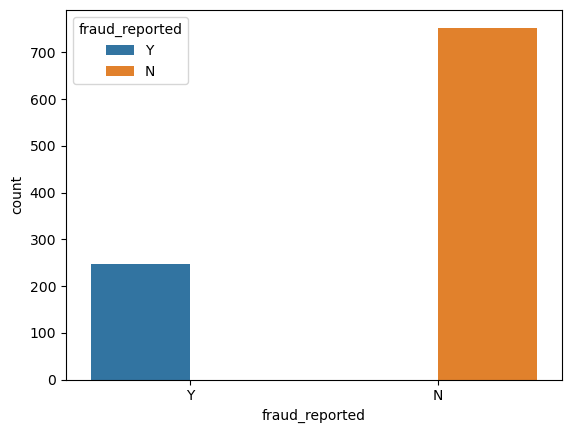

In [21]:
#DATA VISUALIZATION
#visualized the Fraud reported 
ax=sns.countplot(x='fraud_reported',hue='fraud_reported',data=df)
print(df['fraud_reported'].value_counts())

In [22]:
"From above observation we can see the fraud is lesser in compared to non-fraud."

'From above observation we can see the fraud is lesser in compared to non-fraud.'

insured_sex
FEMALE    537
MALE      463
Name: count, dtype: int64


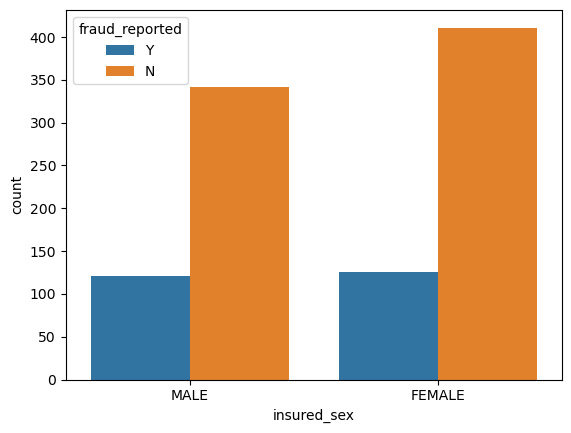

In [23]:
#visualized the Fraud reported by gender
ax=sns.countplot(x='insured_sex',hue='fraud_reported',data=df)
print(df['insured_sex'].value_counts())

In [24]:
"The count of fraud male and female are similarly equal."

'The count of fraud male and female are similarly equal.'

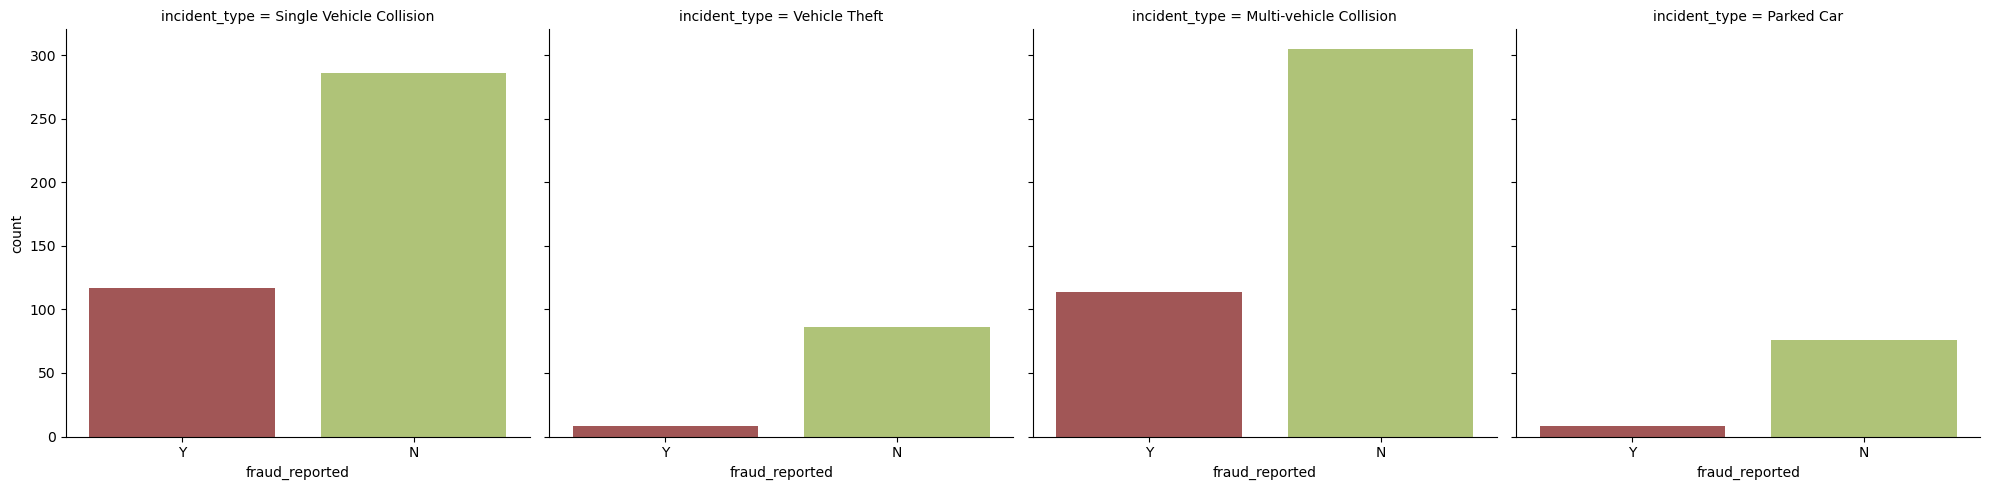

In [25]:
#checking Loan Status and dependents
sns.catplot(x="fraud_reported",col="incident_type",data=df,kind="count",palette='tab20b_r')

In [26]:
"The fraud detect in single and multi vehicle collision are high but less in vehicle theft and parked car."

'The fraud detect in single and multi vehicle collision are high but less in vehicle theft and parked car.'

incident_state
NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: count, dtype: int64


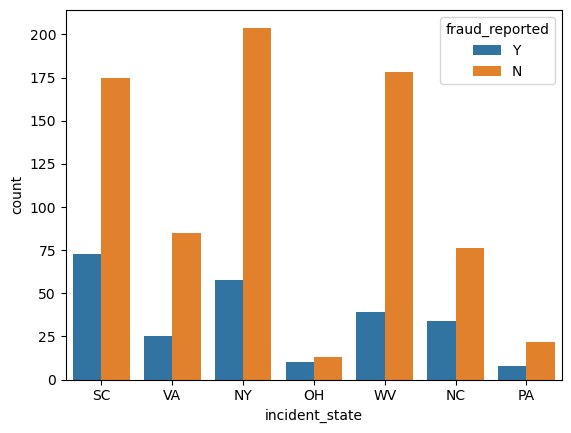

In [27]:
#visualized the fraud reported by incident state
ax=sns.countplot(x='incident_state',hue='fraud_reported',data=df)
print(df['incident_state'].value_counts())

auto_make
Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: count, dtype: int64


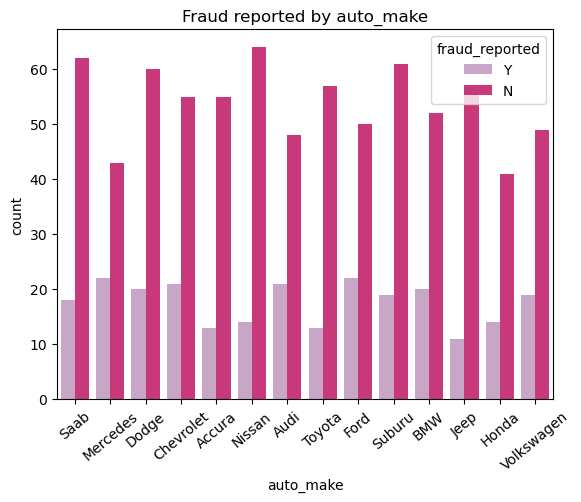

In [28]:
#visualizing the count of fraud reported by auto make
print(df['auto_make'].value_counts())
ax=sns.countplot(x='auto_make',data=df,hue='fraud_reported',palette='PuRd')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40)
plt.title("Fraud reported by auto_make")
plt.show()

In [29]:
"The fraud detection in mercedes,dodge,chevrolet,audi,ford is higher than other auto make."

'The fraud detection in mercedes,dodge,chevrolet,audi,ford is higher than other auto make.'

number_of_vehicles_involved
1    581
3    358
4     31
2     30
Name: count, dtype: int64


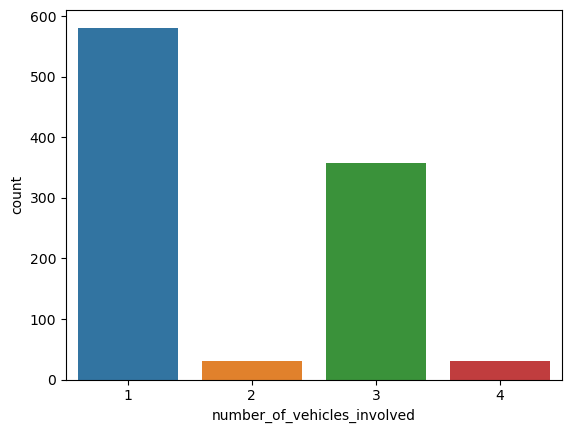

In [30]:
#visualized the number_of_vehicles_involved
ax=sns.countplot(x='number_of_vehicles_involved',data=df)
print(df['number_of_vehicles_involved'].value_counts())

In [32]:
#here dropping unnecessary features
df.drop(['policy_number','policy_bind_date','insured_zip','incident_date','incident_hour_of_the_day','auto_year','_c39'],axis=1,inplace=True)

In [34]:
#checking statistical summary of numerical data
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000


In [35]:
#separating numerical and categorical columns

#checking for categorical column

cat=list(df.select_dtypes(include='object'))
print("Categorical columns: ",cat)
print("\n")

#checking for numerical columns
num=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        num.append(i)
print("numerical columns: ",num)
print("\n")

Categorical columns:  ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


numerical columns:  ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']




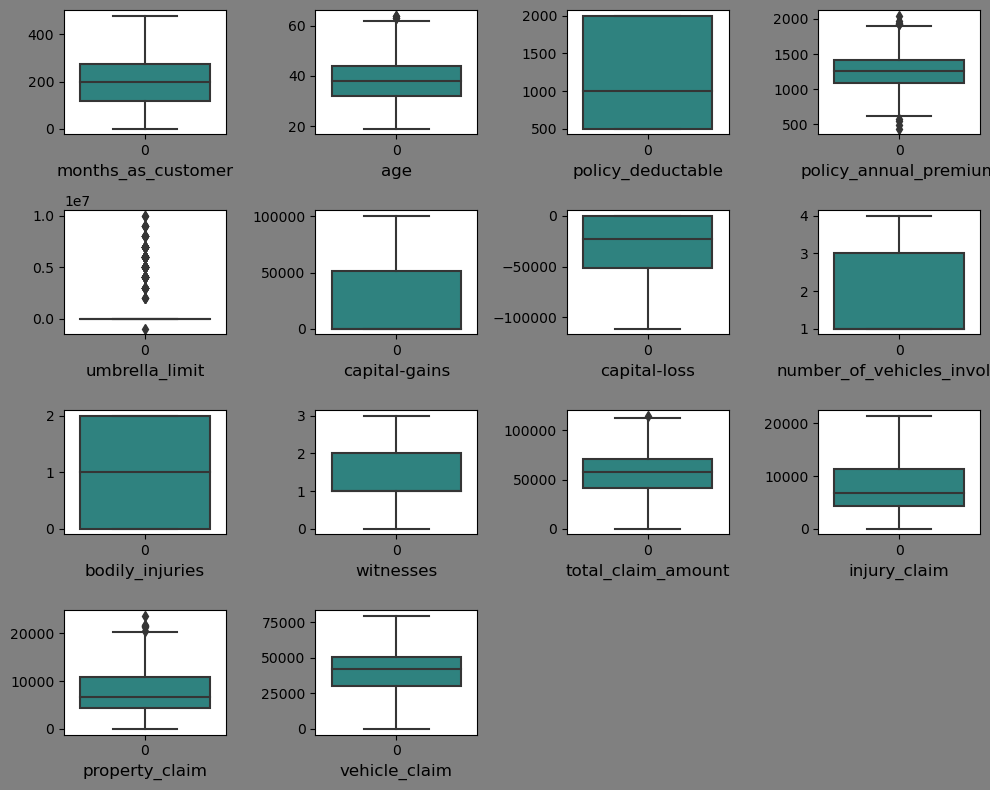

In [37]:
#checking the outliers using boxplot
plt.figure(figsize=(10,8),facecolor="grey")
plotnumber=1
for col in num:
    if plotnumber<=14:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[col],palette="viridis_r")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [38]:
"""From above observation we can see the outliers are present in age,policy_annual_premium,umbrella_limit,total_claim_amount,
property_claim. Using Zscore and IQR technique we can remove outliers."""

'From above observation we can see the outliers are present in age,policy_annual_premium,umbrella_limit,total_claim_amount,\nproperty_claim. Using Zscore and IQR technique we can remove outliers.'

In [39]:
from scipy.stats import zscore
z_score=zscore(df[['age','policy_annual_premium','umbrella_limit','total_claim_amount','property_claim']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]

In [40]:
#after removing outliers
df.shape

(981, 33)

In [43]:
"""After removing the outliers dataset contains 981 rows and 33 columns """

'After removing the outliers dataset contains 981 rows and 33 columns '

In [44]:
#encoding categorical cols using LabelEncoder

from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=lab_enc.fit_transform(df[i].values.reshape(-1,1))
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,2,1,1000,1406.91,0,1,4,2,...,1,2,2,71610,6510,13020,52080,10,1,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,...,0,0,1,5070,780,780,3510,8,12,1
2,134,29,2,0,2000,1413.14,5000000,0,6,11,...,2,3,0,34650,7700,3850,23100,4,30,0
3,256,41,0,1,2000,1415.74,6000000,0,6,1,...,1,2,0,63400,6340,6340,50720,3,34,1
4,228,44,0,2,1000,1583.91,6000000,1,0,11,...,0,1,0,6500,1300,650,4550,0,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,0,5,2,...,0,1,1,87200,17440,8720,61040,6,6,0
996,285,41,0,0,1000,1436.79,0,0,6,9,...,2,3,1,108480,18080,18080,72320,13,28,0
997,130,34,2,1,500,1383.49,3000000,0,5,1,...,2,3,2,67500,7500,7500,52500,11,19,0
998,458,62,0,2,2000,1356.92,5000000,1,0,5,...,0,1,2,46980,5220,5220,36540,1,5,0


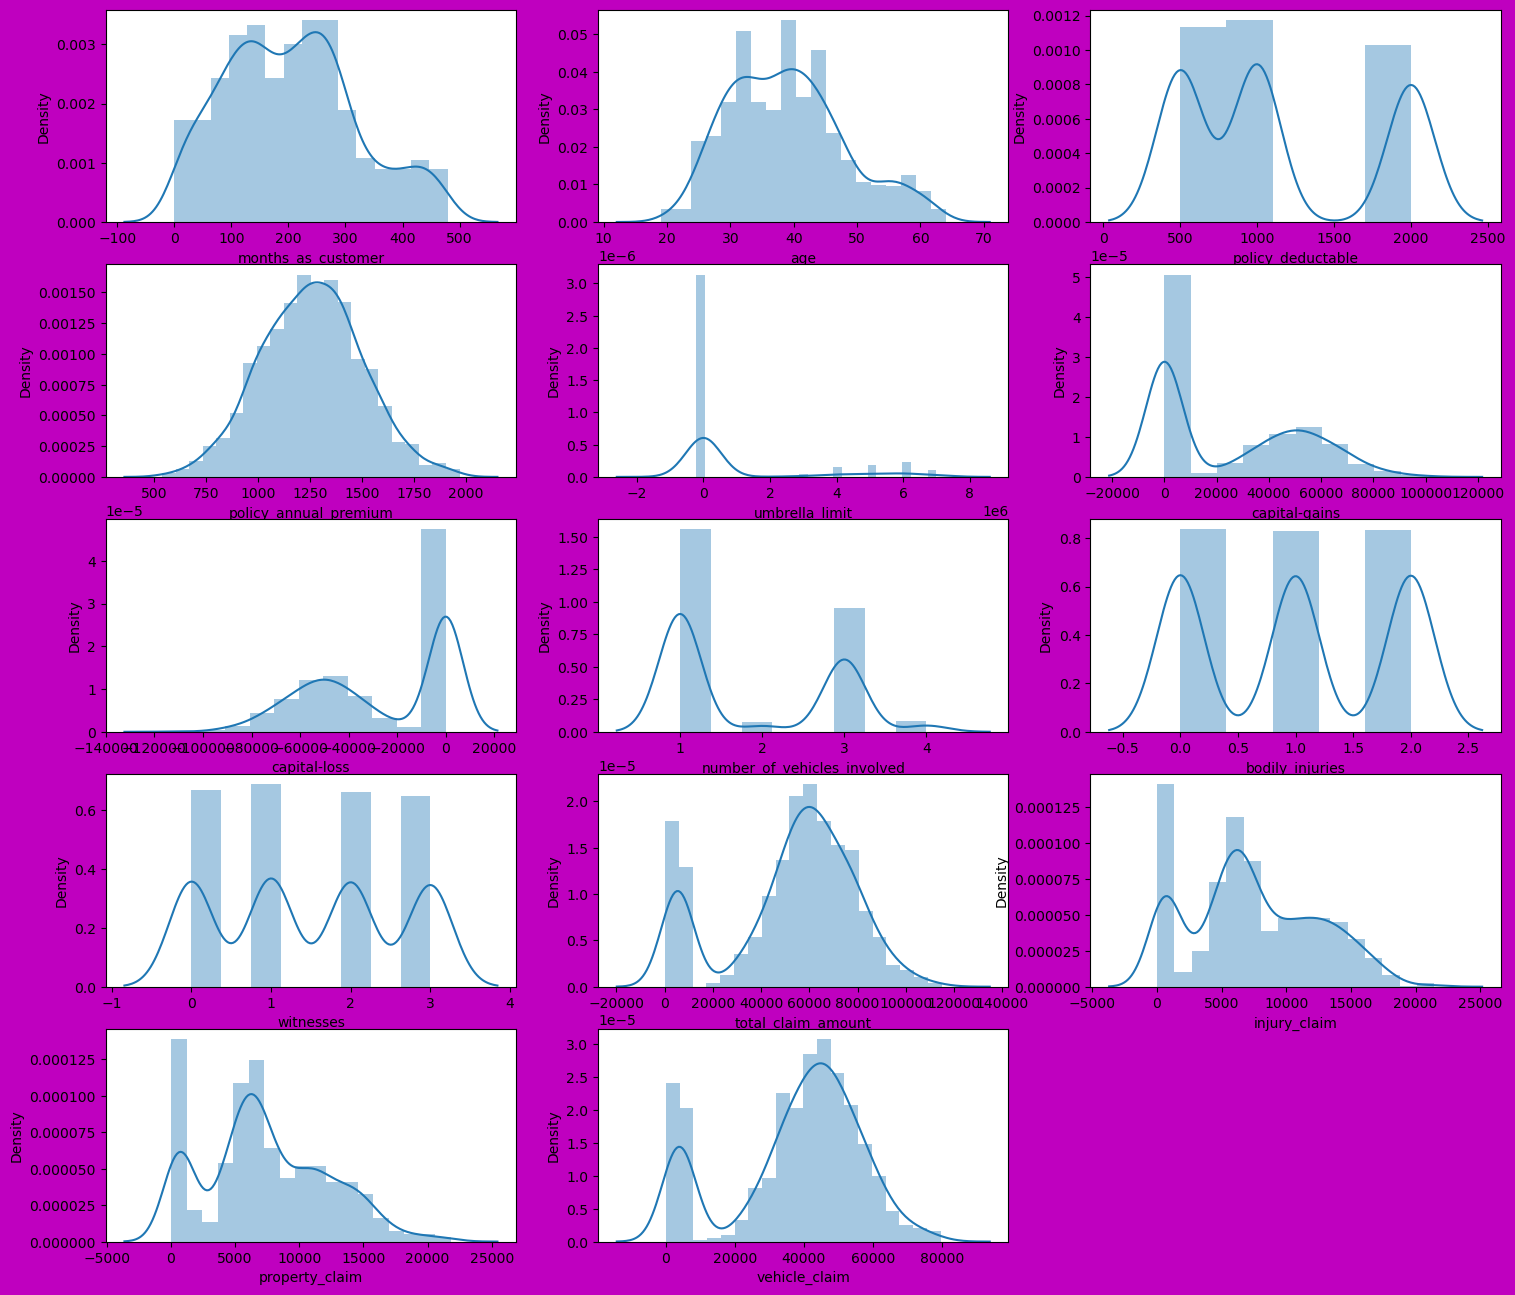

In [47]:
#Cheking For Skewness
#lets see how data is distributed for every column
plt.figure(figsize=(18,16),facecolor='m')
p=1
for col in num:
    if p<=14:
        ax=plt.subplot(5,3,p)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=10)
    p+=1
plt.show()

In [50]:
df.skew()

months_as_customer             0.363268
age                            0.475942
policy_state                  -0.038101
policy_csl                     0.098092
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_limit                 1.803065
insured_sex                    0.141238
insured_education_level        0.006225
insured_occupation            -0.057292
insured_hobbies               -0.060134
insured_relationship           0.076242
capital-gains                  0.465985
capital-loss                  -0.390468
incident_type                  0.092461
collision_type                 0.130043
incident_severity              0.278443
authorities_contacted         -0.294526
incident_state                -0.147048
incident_city                  0.042537
incident_location              0.000000
number_of_vehicles_involved    0.506989
property_damage                0.060615
bodily_injuries                0.001877
witnesses                      0.024567


In [51]:
"""We can remove skewness in contineous data only.we cannot remove skewness in categorical data. therefore using subplot and
distplot we can see the data in contineous nature almost normaly distributed except umbrella limit feature.so, using
cube root method we can remove skewness."""

'We can remove skewness in contineous data only.we cannot remove skewness in categorical data. therefore using subplot and\ndistplot we can see the data in contineous nature almost normaly distributed except umbrella limit feature.so, using\ncube root method we can remove skewness.'

In [52]:
#Using cube root method we can remove skewness
df['umbrella_limit']=np.cbrt(df['umbrella_limit'])

In [53]:
#again checking skewness
df.skew()

months_as_customer             0.363268
age                            0.475942
policy_state                  -0.038101
policy_csl                     0.098092
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_limit                 1.605531
insured_sex                    0.141238
insured_education_level        0.006225
insured_occupation            -0.057292
insured_hobbies               -0.060134
insured_relationship           0.076242
capital-gains                  0.465985
capital-loss                  -0.390468
incident_type                  0.092461
collision_type                 0.130043
incident_severity              0.278443
authorities_contacted         -0.294526
incident_state                -0.147048
incident_city                  0.042537
incident_location              0.000000
number_of_vehicles_involved    0.506989
property_damage                0.060615
bodily_injuries                0.001877
witnesses                      0.024567


In [54]:
#checking the correlation between features and target
cor=df.corr()
cor

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
months_as_customer,1.000000,0.922960,-0.007179,-0.021865,0.030777,-0.003875,0.007978,0.059770,-0.000735,0.006786,...,-0.007870,0.063289,-0.053963,0.058609,0.064864,0.036471,0.055831,0.049912,0.005350,0.021375
age,0.922960,1.000000,-0.020009,-0.013330,0.031851,0.005290,0.000839,0.073857,0.001645,0.014703,...,-0.012377,0.056159,-0.050489,0.067703,0.077002,0.062231,0.058842,0.033873,0.015456,0.013338
policy_state,-0.007179,-0.020009,1.000000,0.001651,0.017559,0.015079,-0.009350,-0.017970,-0.027173,-0.025369,...,0.012057,0.025779,0.040247,-0.014708,-0.048189,-0.006442,-0.006425,0.010283,-0.017956,0.034595
policy_csl,-0.021865,-0.013330,0.001651,1.000000,0.009999,0.032677,0.012651,-0.003467,0.008339,0.016512,...,0.001468,0.071387,-0.010259,-0.054056,-0.079989,-0.042783,-0.043937,-0.009480,0.042770,-0.032542
policy_deductable,0.030777,0.031851,0.017559,0.009999,1.000000,-0.007754,0.005780,-0.008308,0.014117,-0.052613,...,-0.035434,0.073531,0.031862,0.024955,0.039835,0.072395,0.006137,-0.029963,-0.004556,0.014936
policy_annual_premium,-0.003875,0.005290,0.015079,0.032677,-0.007754,1.000000,-0.009790,0.040936,-0.021390,0.028133,...,0.028279,0.003949,0.032490,0.000082,-0.023726,-0.013674,0.009747,0.008776,-0.038708,-0.012900
umbrella_limit,0.007978,0.000839,-0.009350,0.012651,0.005780,-0.009790,1.000000,0.017412,-0.024262,0.006430,...,0.060097,-0.004589,-0.035558,-0.043961,-0.043866,-0.019581,-0.045097,0.018145,0.012826,0.049914
insured_sex,0.059770,0.073857,-0.017970,-0.003467,-0.008308,0.040936,0.017412,1.000000,0.010044,-0.008228,...,-0.016346,0.037991,0.001209,-0.017024,0.007515,-0.009709,-0.023277,0.021281,-0.017329,0.021111
insured_education_level,-0.000735,0.001645,-0.027173,0.008339,0.014117,-0.021390,-0.024262,0.010044,1.000000,-0.025367,...,-0.017920,0.021756,0.056504,0.079449,0.086578,0.062218,0.072782,0.059955,0.042665,0.013102
insured_occupation,0.006786,0.014703,-0.025369,0.016512,-0.052613,0.028133,0.006430,-0.008228,-0.025367,1.000000,...,0.000822,-0.015252,-0.030094,0.008991,0.025668,0.010904,0.003138,0.043096,0.013966,-0.000208


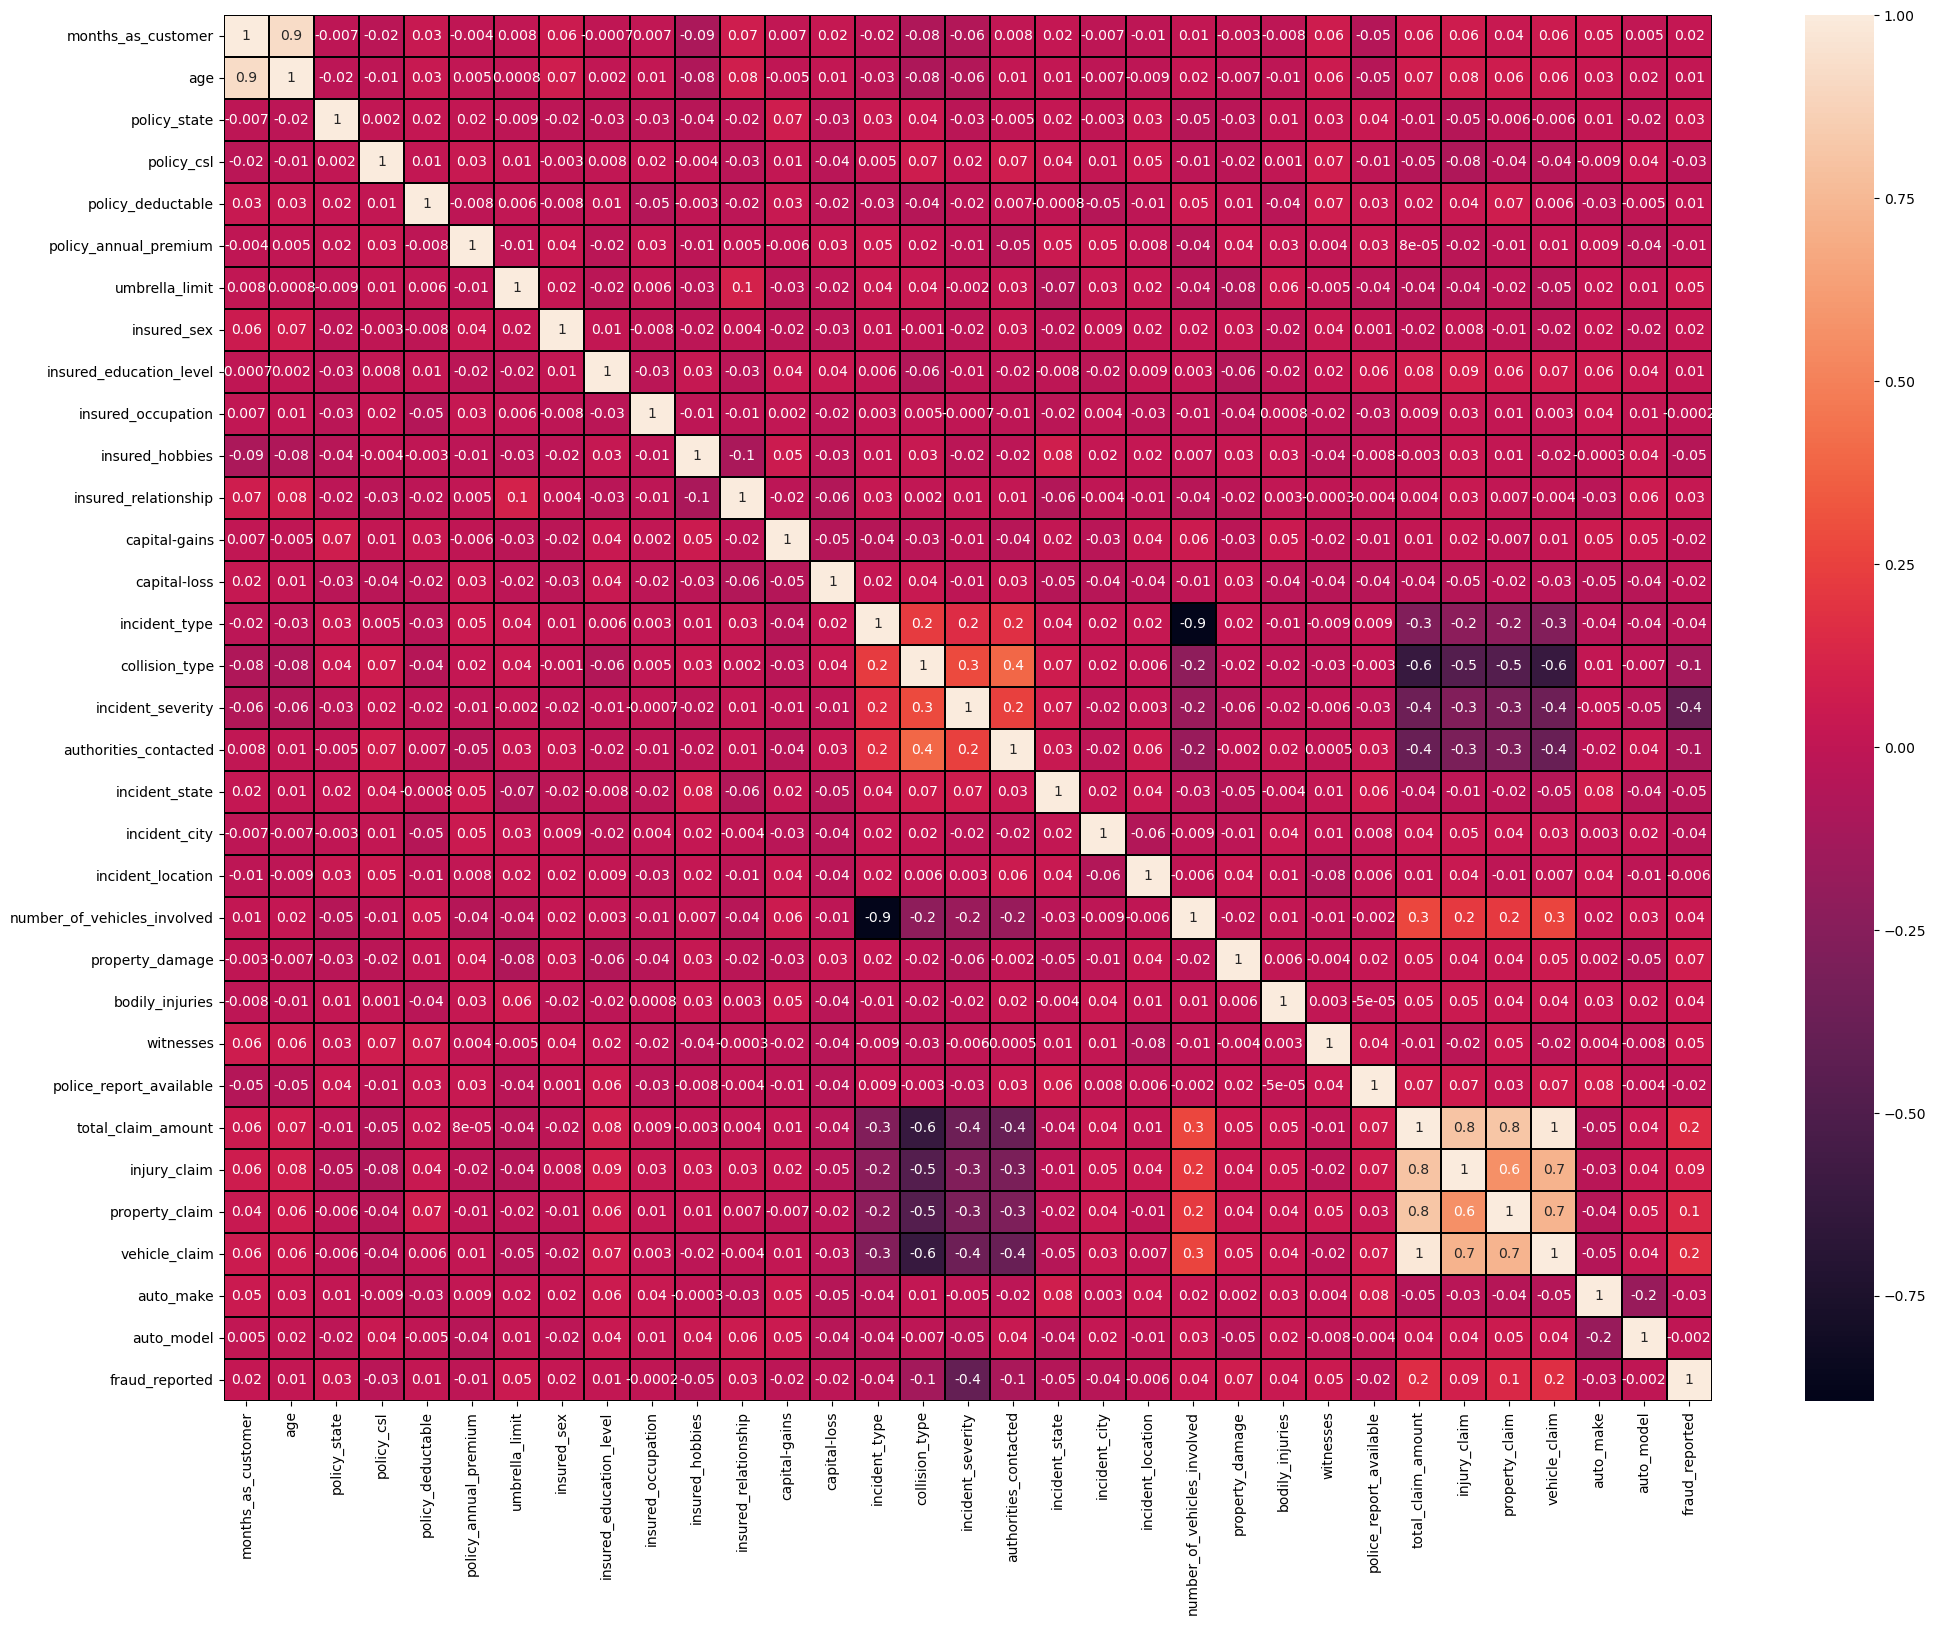

In [61]:
#visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(24,18))
sns.heatmap(df.corr(),linewidths=0.2,fmt=".1g",linecolor="black",annot=True)
plt.yticks(rotation=0);
plt.show()

In [66]:
"""From above observation we can see the vehicle claim,total claim amount,umbrella limit,property damage,witnesses,injury claim 
are positively related to target. and insured occupation is not related to target."""

'From above observation we can see the vehicle claim,total claim amount,umbrella limit,property damage,witnesses,injury claim \nare positively related to target. and insured occupation is not related to target.'

In [63]:
#We can observe the positive and negative correlated features with the target
cor['fraud_reported'].sort_values(ascending = False)

fraud_reported                 1.000000
vehicle_claim                  0.170373
total_claim_amount             0.163423
property_claim                 0.138408
injury_claim                   0.088173
property_damage                0.074318
umbrella_limit                 0.049914
witnesses                      0.049126
number_of_vehicles_involved    0.042834
bodily_injuries                0.038436
policy_state                   0.034595
insured_relationship           0.026013
months_as_customer             0.021375
insured_sex                    0.021111
policy_deductable              0.014936
age                            0.013338
insured_education_level        0.013102
insured_occupation            -0.000208
auto_model                    -0.002027
incident_location             -0.006489
policy_annual_premium         -0.012900
capital-loss                  -0.015787
capital-gains                 -0.016114
police_report_available       -0.017254
auto_make                     -0.031368


In [67]:
#separating features and label
x=df.drop("fraud_reported",axis=1)
y=df["fraud_reported"]

In [68]:
#Feature Scaling using Standard Scalarization
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model
0,1.070264,0.983956,1.180447,0.067197,-0.225968,0.619923,-0.479247,1.072994,0.533151,-1.157117,...,1.291998,0.001248,0.464781,1.268594,0.717821,-0.188645,1.174939,0.753457,0.852973,-1.638317
1,0.202991,0.329985,-0.024567,0.067197,1.410009,-0.248937,2.035351,1.072994,0.533151,-0.161169,...,0.042047,-1.222563,-1.333838,0.036425,-1.809969,-1.362026,-1.379994,-1.825887,0.356523,-0.650052
2,-0.612245,-1.086951,1.180447,-1.176582,1.410009,0.645737,2.035351,-0.931972,1.557678,1.083766,...,-1.207903,1.225058,1.364090,-1.195744,-0.686254,0.055042,-0.739173,-0.785546,-0.636377,0.967110
3,0.445828,0.220990,-1.229581,0.067197,1.410009,0.656510,2.192912,-0.931972,1.557678,-1.406105,...,0.042047,0.001248,0.464781,-1.195744,0.405931,-0.223457,-0.219420,0.681233,-0.884602,1.326479
4,0.202991,0.547975,-1.229581,1.310976,-0.225968,1.353331,2.192912,1.072994,-1.515903,1.083766,...,-1.207903,-1.222563,-0.434529,-1.195744,-1.755645,-1.255541,-1.407130,-1.770657,-1.629278,1.056952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,-1.748372,-0.105995,1.180447,1.310976,-0.225968,0.221687,-0.479247,-0.931972,1.045414,-1.157117,...,1.291998,-1.222563,-0.434529,0.036425,1.310069,2.049585,0.277372,1.229284,-0.139927,-1.189106
977,0.697337,0.220990,-1.229581,-1.176582,-0.225968,0.743732,-0.479247,-0.931972,1.557678,0.585792,...,1.291998,1.225058,1.364090,0.036425,2.118476,2.180643,2.231144,1.828316,1.597649,0.787425
978,-0.646936,-0.541976,1.180447,0.067197,-1.043957,0.522881,1.641647,-0.931972,1.045414,-1.406105,...,0.042047,1.225058,1.364090,1.268594,0.561686,0.014086,0.022714,0.775761,1.101198,-0.021156
979,2.197719,2.509887,-1.229581,1.310976,1.410009,0.412787,2.035351,1.072994,-1.515903,-0.410156,...,0.042047,-1.222563,-0.434529,1.268594,-0.217849,-0.452809,-0.453205,-0.071806,-1.381053,-1.278948


In [69]:
#Checking Variance Inflation Factor(VIF)
#finding variance inflation factor in each scaled col 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) 
for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,6.890141,months_as_customer
1,6.884097,age
2,1.027239,policy_state
3,1.030801,policy_csl
4,1.034714,policy_deductable
5,1.026649,policy_annual_premium
6,1.035868,umbrella_limit
7,1.021962,insured_sex
8,1.034333,insured_education_level
9,1.016283,insured_occupation


In [70]:
"""By checking VIF values we can see there is no multicollinarity problem. """

'By checking VIF values we can see there is no multicollinarity problem. '

In [71]:
y.value_counts()

fraud_reported
0    741
1    240
Name: count, dtype: int64

In [72]:
"'Here we can see that the data is not balanced,SO we will balance the data using SMOTE method'"

"'Here we can see that the data is not balanced,SO we will balance the data using SMOTE method'"

In [73]:
#OVERSAMPLING
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x, y)

In [74]:
#checking value count of target col
y.value_counts()

fraud_reported
0    741
1    240
Name: count, dtype: int64

In [75]:
y1.value_counts()

fraud_reported
1    741
0    741
Name: count, dtype: int64

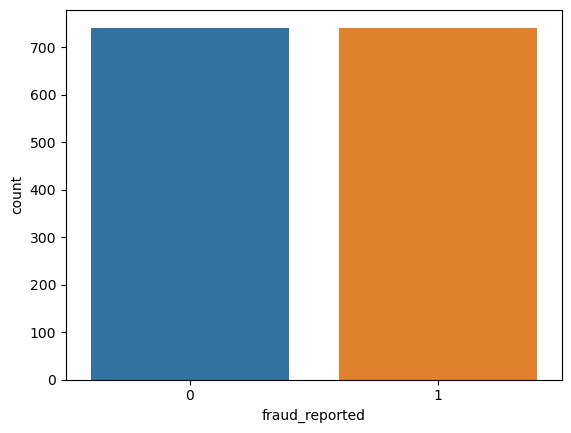

In [76]:
"""Now,we can see the data is balanced"""
#checking the count of Fraud reported
sns.countplot(data=df,x=y1)
plt.show()

In [79]:
#split into train test data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=58)

In [80]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier

def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("\n----------------Train Result------------------\n")
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred=clf.predict(x_test)
        print("\n----------------Test Result------------------\n")
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%")
        print('\n\n The Classification Report\n', classification_report(y_test,pred,digits=2))

In [81]:
random_clf=RandomForestClassifier()
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [82]:
metric_score(random_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)


----------------Train Result------------------

Accuracy Score: 100.00%

----------------Test Result------------------

Accuracy Score: 89.44%


 The Classification Report
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       239
           1       0.86      0.92      0.89       206

    accuracy                           0.89       445
   macro avg       0.89      0.90      0.89       445
weighted avg       0.90      0.89      0.89       445



In [83]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [84]:
metric_score(LR,x_train,x_test,y_train,y_test,train=True)
metric_score(LR,x_train,x_test,y_train,y_test,train=False)


----------------Train Result------------------

Accuracy Score: 75.31%

----------------Test Result------------------

Accuracy Score: 74.61%


 The Classification Report
               precision    recall  f1-score   support

           0       0.80      0.70      0.75       239
           1       0.70      0.80      0.74       206

    accuracy                           0.75       445
   macro avg       0.75      0.75      0.75       445
weighted avg       0.75      0.75      0.75       445



In [85]:
from sklearn.ensemble import ExtraTreesClassifier
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)

ExtraTreesClassifier()

In [86]:
metric_score(ETC,x_train,x_test,y_train,y_test,train=True)
metric_score(ETC,x_train,x_test,y_train,y_test,train=False)


----------------Train Result------------------

Accuracy Score: 100.00%

----------------Test Result------------------

Accuracy Score: 90.56%


 The Classification Report
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       239
           1       0.88      0.93      0.90       206

    accuracy                           0.91       445
   macro avg       0.91      0.91      0.91       445
weighted avg       0.91      0.91      0.91       445



In [87]:
#..........CROSS VALIDATION SCORE........
from sklearn.model_selection import cross_val_score

In [88]:
#checking cv score for Random Forest Classifier
score=cross_val_score(random_clf,x,y)
print(score)
print(score.mean())

#here predicting once again because variables inside the function are local variables
pred=random_clf.predict(x_test)
acc_score1=accuracy_score(y_test,pred)
acc_score1

print("Difference between Accuracy Score and Cross Validation Score:",acc_score1-score.mean())

[0.76142132 0.73979592 0.76530612 0.76530612 0.79081633]
0.7645291619185746
Difference between Accuracy Score and Cross Validation Score: 0.12985286055333556


In [89]:
#checking cv score for Logistic Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())

#here predicting once again because variables inside the function are local variables
pred=LR.predict(x_test)
acc_score2=accuracy_score(y_test,pred)
acc_score2

print("Difference between Accuracy Score and Cross Validation Score:",acc_score2-score.mean())

[0.78172589 0.77040816 0.73469388 0.79591837 0.80612245]
0.777773749093546
Difference between Accuracy Score and Cross Validation Score: -0.03170633336320894


In [90]:
#checking cv score for Extra Trees Classifier
score=cross_val_score(ETC,x,y)
print(score)
print(score.mean())

#here predicting once again because variables inside the function are local variables
pred=ETC.predict(x_test)
acc_score3=accuracy_score(y_test,pred)
acc_score3

print("Difference between Accuracy Score and Cross Validation Score:",acc_score3-score.mean())

[0.78680203 0.75       0.76020408 0.77040816 0.76530612]
0.7665440795607583
Difference between Accuracy Score and Cross Validation Score: 0.1390738979673316


In [91]:
"""Logistic Regression is our best model as the difference between accuracy score and cross 
validation score is least

...............Logistic Regression IS OUR BEST MODEL......"""

'Logistic Regression is our best model as the difference between accuracy score and cross \nvalidation score is least\n\n...............Logistic Regression IS OUR BEST MODEL......'

In [92]:
#Hyperparameter Tunning
from sklearn.model_selection import GridSearchCV
param = {
            'penalty':['l1','l2','elasticnet','none'],
            'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
            'max_iter'  : [10,50,80,150]
      }
gscv=GridSearchCV(LogisticRegression(),param,n_jobs=-1,cv=5,verbose=True)
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [10, 50, 80, 150],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             verbose=True)

In [93]:
gscv.best_params_

{'max_iter': 10, 'penalty': 'l1', 'solver': 'saga'}

In [94]:
model=LogisticRegression(penalty='l1',max_iter=10,solver='saga')
model.fit(x_train,y_train)
pred=model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

74.8314606741573


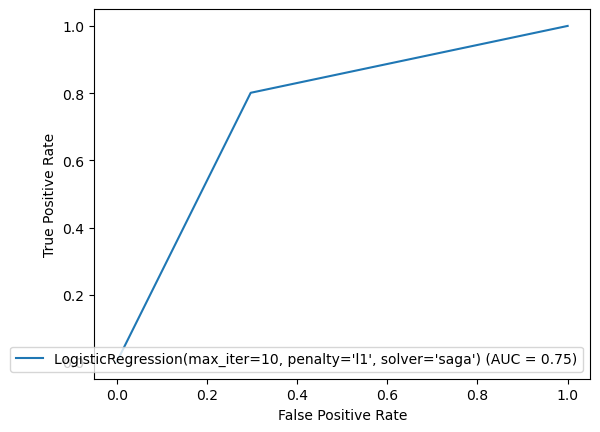

In [95]:
from sklearn.metrics import roc_curve
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=model)
display.plot()

In [96]:
#saving model
import joblib
joblib.dump(model,"frd_rep.pkl")

['frd_rep.pkl']

In [97]:
model=joblib.load("frd_rep.pkl")
prediction=model.predict(x_test)
prediction

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,

In [98]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,0,0
1,0,0
2,1,0
3,0,0
4,1,0
...,...,...
440,1,0
441,0,0
442,1,0
443,0,0


In [100]:
>>Logistic Regressor is our best model as the difference between accuracy score and cross 
  validation score is least.
>>The best accuracy score is 74.83% for prediction of fraud report of insurance claim.